In [64]:
import pandas as pd
import numpy as np
import re
import string
import textCleaning as tc

df = pd.read_csv("data/tiktok_comments_final.csv")
data_df = pd.DataFrame(df)

data_df = data_df[['createTime', 'text']]
data_df

,createTime,text
0,1764933105,gibran:
1,1764928295,ini emg harusnya ganti rakyat sih. bgnian emg ...
2,1764922201,wapres aja gak pakek rompi anti peluru
3,1764925978,di indo doang presiden n wapres di hujat wkwk
4,1764922173,"di X parah bett anjir komenannya, merinding la..."
...,...,...
4269,1765331173,kan itu emang kewajibannya melayani rakyat😑
4270,1765333223,nangis liat pak Gibran... Kya ga nyangka orang...
4271,1765298555,wapres serasa sahabat ☺️
4272,1764937763,"tapi aku kasian klo liat pak gibran, dia serba..."


In [65]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4274 entries, 0 to 4273
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   createTime  4274 non-null   int64 
 1   text        4236 non-null   object
dtypes: int64(1), object(1)
memory usage: 66.9+ KB


In [66]:
data_df.dropna(inplace=True, subset=['text', 'createTime'])
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4236 entries, 0 to 4273
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   createTime  4236 non-null   int64 
 1   text        4236 non-null   object
dtypes: int64(1), object(1)
memory usage: 99.3+ KB


In [67]:
def clean_text_for_indobert(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'www\.\S+', '', text)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s.,!?]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

data_df['cleaned_text'] = data_df['text'].apply(clean_text_for_indobert)
data_df

,createTime,text,cleaned_text
0,1764933105,gibran:,gibran
1,1764928295,ini emg harusnya ganti rakyat sih. bgnian emg ...,ini emg harusnya ganti rakyat sih. bgnian emg ...
2,1764922201,wapres aja gak pakek rompi anti peluru,wapres aja gak pakek rompi anti peluru
3,1764925978,di indo doang presiden n wapres di hujat wkwk,di indo doang presiden n wapres di hujat wkwk
4,1764922173,"di X parah bett anjir komenannya, merinding la...","di x parah bett anjir komenannya, merinding la..."
...,...,...,...
4269,1765331173,kan itu emang kewajibannya melayani rakyat😑,kan itu emang kewajibannya melayani rakyat
4270,1765333223,nangis liat pak Gibran... Kya ga nyangka orang...,nangis liat pak gibran... kya ga nyangka orang...
4271,1765298555,wapres serasa sahabat ☺️,wapres serasa sahabat
4272,1764937763,"tapi aku kasian klo liat pak gibran, dia serba...","tapi aku kasian klo liat pak gibran, dia serba..."


In [68]:
wordcloudtxt = data_df["cleaned_text"].apply(tc.tokenizingText).apply(tc.filteringText)

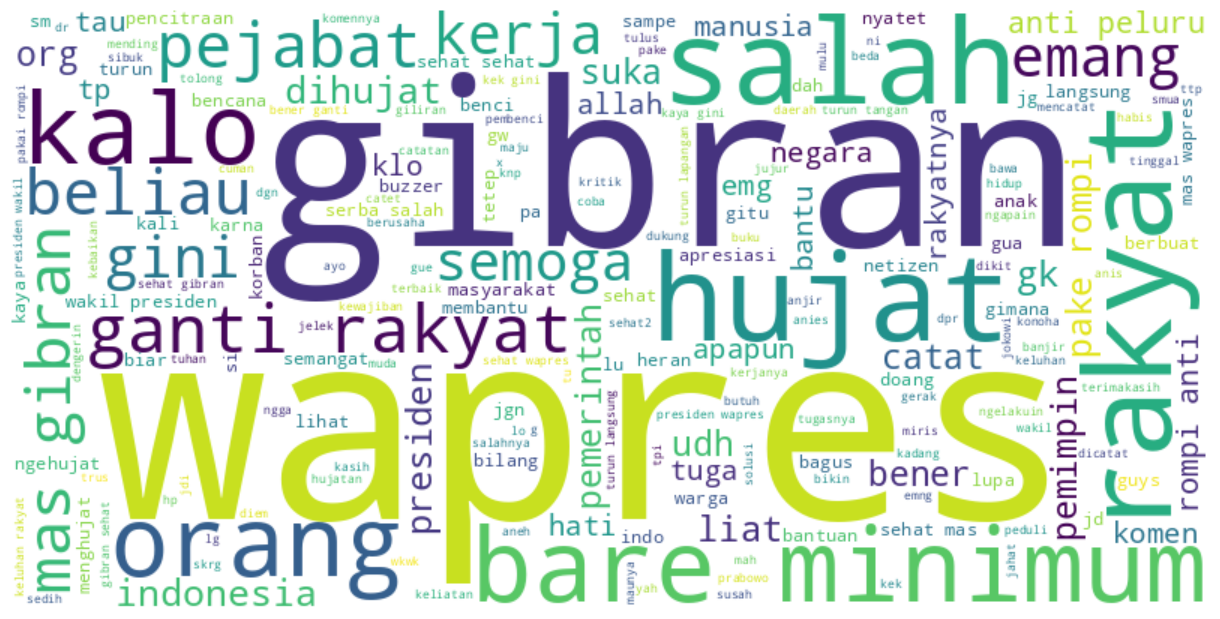

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
    
# Convert list of tokens back to string
wordcloud_text = ' '.join(wordcloudtxt.apply(lambda x: ' '.join(x)))

# Create wordcloud from cleaned text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)

# Display wordcloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [70]:
from transformers import pipeline

# Hindari registrasi ulang namespace prims dengan tidak membuat pipeline berulang kali
if 'nlp' not in globals():
    pretrained_name = "w11wo/indonesian-roberta-base-sentiment-classifier"
    nlp = pipeline(
        "sentiment-analysis",
        model=pretrained_name,
        tokenizer=pretrained_name,
        return_all_scores=True
    )

def compute_sentiment_score(text):
    result = nlp(text)[0]
    
    P_Positive = result[0]['score']
    P_Neutral = result[1]['score']
    P_Negative = result[2]['score']
    
    y = (1 * P_Positive) + (0 * P_Neutral) + (-1 * P_Negative)
    return y

In [73]:
data_df['sentiment_score'] = data_df['text'].apply(compute_sentiment_score)
data_df['sentiment_label'] = data_df['sentiment_score'].apply(lambda x: 'positive' if x > 0.2 else ('negative' if x < -0.2 else 'neutral'))
data_df

,createTime,text,cleaned_text,sentiment_score,sentiment_label
0,1764933105,gibran:,gibran,0.000589,neutral
1,1764928295,ini emg harusnya ganti rakyat sih. bgnian emg ...,ini emg harusnya ganti rakyat sih. bgnian emg ...,-0.998087,negative
2,1764922201,wapres aja gak pakek rompi anti peluru,wapres aja gak pakek rompi anti peluru,-0.020831,neutral
3,1764925978,di indo doang presiden n wapres di hujat wkwk,di indo doang presiden n wapres di hujat wkwk,-0.998892,negative
4,1764922173,"di X parah bett anjir komenannya, merinding la...","di x parah bett anjir komenannya, merinding la...",0.637577,positive
...,...,...,...,...,...
4269,1765331173,kan itu emang kewajibannya melayani rakyat😑,kan itu emang kewajibannya melayani rakyat,0.902293,positive
4270,1765333223,nangis liat pak Gibran... Kya ga nyangka orang...,nangis liat pak gibran... kya ga nyangka orang...,-0.996391,negative
4271,1765298555,wapres serasa sahabat ☺️,wapres serasa sahabat,0.990364,positive
4272,1764937763,"tapi aku kasian klo liat pak gibran, dia serba...","tapi aku kasian klo liat pak gibran, dia serba...",-0.997878,negative


In [74]:
x = pd.to_datetime(data_df['createTime'], unit='s')
x.describe()

count                             4236
mean     2025-12-06 12:40:04.164305920
min                2025-12-05 08:04:20
25%      2025-12-05 15:03:04.750000128
50%                2025-12-06 08:08:21
75%      2025-12-07 03:42:42.249999872
max                2025-12-10 08:05:57
Name: createTime, dtype: object

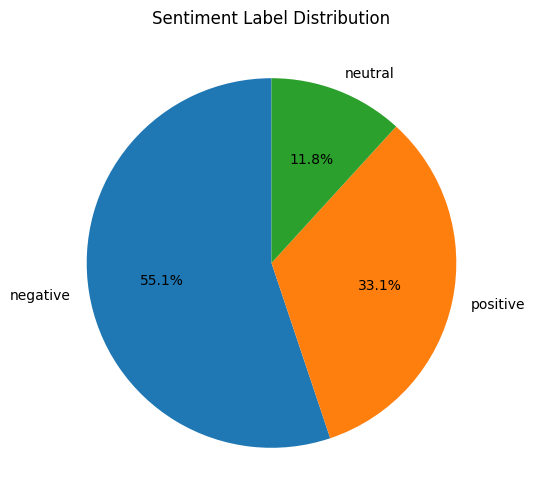

In [75]:
# Count sentiment labels
sentiment_counts = data_df['sentiment_label'].value_counts()

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Sentiment Label Distribution")
plt.show()

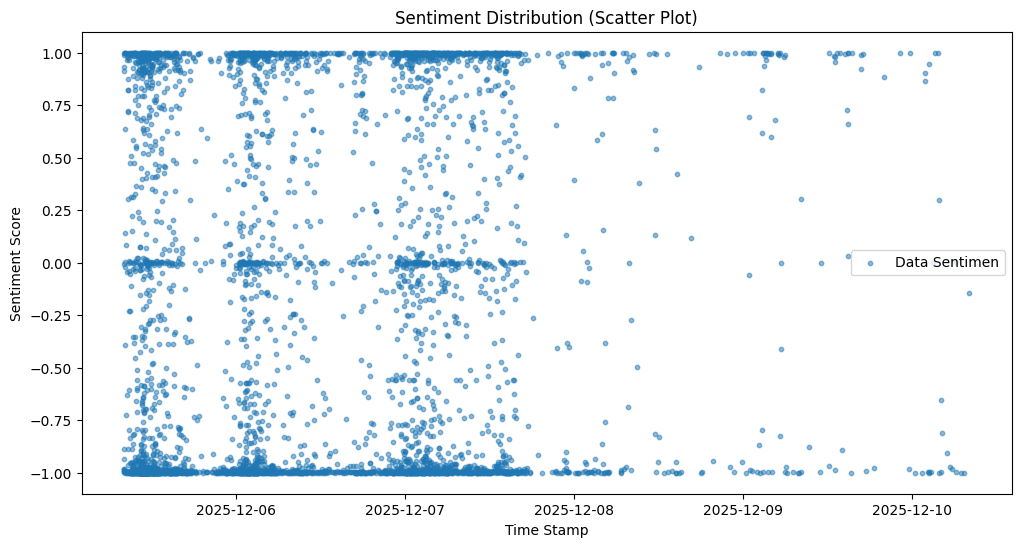

In [76]:
# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(x, data_df['sentiment_score'], alpha=0.5, s=10, label='Data Sentimen')
plt.title("Sentiment Distribution (Scatter Plot)")
plt.xlabel("Time Stamp")
plt.ylabel("Sentiment Score")
plt.legend()
plt.show()

In [77]:
df_regression = pd.DataFrame()
start_time = x.min()

df_regression['x'] = (x - start_time).dt.total_seconds() / 3600
df_regression['y'] = data_df['sentiment_score']
df_regression


,x,y
0,3.123611,0.000589
1,1.787500,-0.998087
2,0.094722,-0.020831
3,1.143889,-0.998892
4,0.086944,0.637577
...,...,...
4269,113.698056,0.902293
4270,114.267500,-0.996391
4271,104.637500,0.990364
4272,4.417500,-0.997878


MSE Model Linear (Kaku): 0.6966311600992339


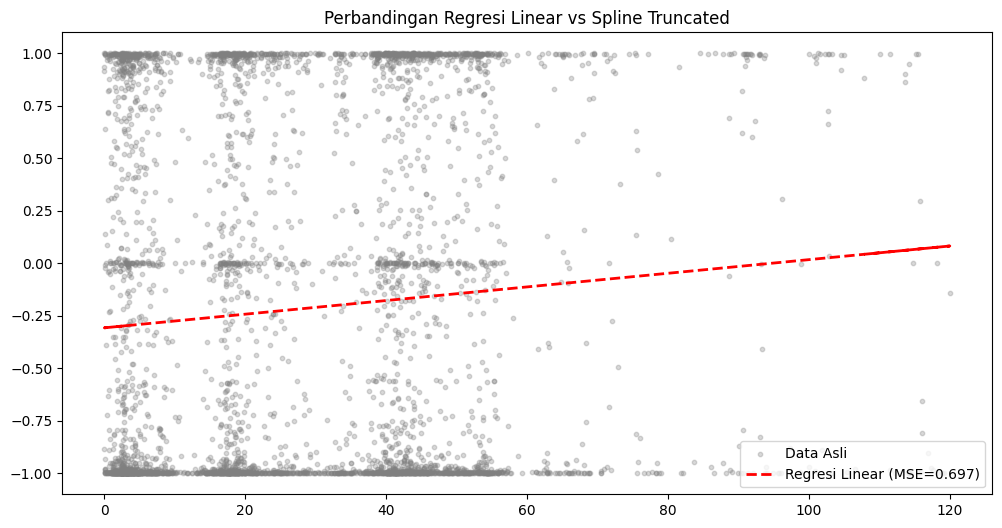

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

x = df_regression['x'].values
y = df_regression['y'].values
coeffs_linear = np.polyfit(x, y, 1) 
y_linear = np.polyval(coeffs_linear, x)

mse_linear = mean_squared_error(y, y_linear)


print(f"MSE Model Linear (Kaku): {mse_linear}")

plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='gray', alpha=0.3, s=10, label='Data Asli')
plt.plot(x, y_linear, color='red', linestyle='--', linewidth=2, label=f'Regresi Linear (MSE={mse_linear:.3f})')
plt.legend()
plt.title("Perbandingan Regresi Linear vs Spline Truncated")
plt.show()